In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle
sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 200)

In [2]:
# Import Data From Preliminary Analysis
df_hist = pd.read_pickle('calculations\df_hist.pickle')
df_spec = pd.read_pickle('calculations\df_spec.pickle')
df_arch = pd.read_pickle('calculations\df_arch.pickle')
df_recommendations = pd.read_pickle('calculations\df_recommendations.pickle')

In [3]:
# plotting function

def plot_fork_length_by_sample(df_specimen, df_historical, sample_id, feature='fork_length', bin_width=5, density=False, subtitle='', duplicate='unknown', right=True):
    """ 
    duplicate can be True, False, or 'unknown' 
    right=True denotes right inclusive bins (the correct choice for this dataset as shown in prelim summary workbook)
        this is a hack because matplotlib doesn't have a parameter for this so bins are just offset by 0.1
    """
    
    figsize=(16,4)
    offset = 0.1 if right else 0  # this is a hack - plt.hist() doesn't seem to have a right inclusive option for bins...
    bins_plot = [x*5+offset + 20 for x in range(30)]  # centered on n%5==3 like df_spec, rounded to int%5 (could use +20.5 also to center perfectly on n%5==3)
    
    if duplicate == 'unknown':
        colours = sns.color_palette()[0], sns.color_palette('pastel')[1]
    elif duplicate: # duplicated
        colours = sns.color_palette()[0], sns.color_palette('pastel')[2]
    else: # not duplicated
        colours = sns.color_palette()[0], sns.color_palette('deep')[6]
        
    plt.figure(figsize=figsize)
    plt.xlim(20, 170)  # use same scale for all histograms for easy comparison
    df_specimen.loc[df_specimen.sample_id==sample_id, feature].dropna().hist(alpha=0.6, color=colours[0], density=density, label=f'Specimen {feature}', bins=bins_plot)
    df_historical.loc[df_historical.sample_id==sample_id, feature].dropna().hist(alpha=0.8, color=colours[1], density=density, label=f'Bioligical {feature}', bins=bins_plot, rwidth=0.7)
    
    feature_title = feature.title().replace("_"," ")
    plt.legend(loc='upper right')
    subtitle = ' - ' + subtitle if subtitle else ''
    plt.title(f'Sample {sample_id}: {feature_title} Comparison - Specimen vs Biological Data{subtitle}')
    plt.ylabel('Counts')
    plt.xlabel(f'{feature_title}')
    plt.show()


# RECOMMENDATIONS

In [4]:
all_flags = ['specimen_data', 'enough_spec_data', 'zero_error_sample', 'high_error_potential_duplicate', 'matched_counts']
other_columns = ['n_hist', 'n_spec', 'error', 'mean_error']

# RECOMMENDATION: specimen_data == False
### duplicate = False

In [5]:
print('Summary Flag:', flag := all_flags[0])
display(df_recommendations[df_recommendations[flag].notnull()][['n_hist','n_spec']])

Summary Flag: specimen_data


,n_hist,n_spec
sample_id,,
4390,34,0
4391,14,0
4392,13,0
4393,3,0
4394,21,0
4395,17,0
4396,9,0
4397,23,0
4398,19,0


# RECOMMENDATION: enough_spec_data == False
### duplicate = False

In [6]:
print('Summary Flag:', flag := all_flags[1])
display(df_recommendations[df_recommendations[flag].notnull()][other_columns])

Summary Flag: enough_spec_data


,n_hist,n_spec,error,mean_error
sample_id,,,,
5246,22,7,9999.000,454.500
5266,14,2,9999.000,714.214
5270,20,3,9999.000,499.950
5271,30,5,9999.000,333.300
5348,11,10,9999.000,909.000
5357,20,2,9999.000,499.950
7532,17,6,9999.000,588.176
7857,51,32,9999.000,196.059


# RECOMMENDATION: zero_error_samples == True
Every fish in these samples is in a matching bin bio vs spec
### duplicate = True

In [7]:
print('Summary Flag:', flag := all_flags[2])
display(df_recommendations[df_recommendations[flag].notnull()][other_columns].describe())

Summary Flag: zero_error_sample


,n_hist,n_spec,error,mean_error
count,534.000,534.000,534.000,534.000
mean,42.318,102.682,0.000,0.000
std,45.497,120.552,0.000,0.000
min,1.000,1.000,0.000,0.000
25%,9.000,33.000,0.000,0.000
50%,33.500,67.000,0.000,0.000
75%,56.000,133.750,0.000,0.000
max,346.000,1016.000,0.000,0.000


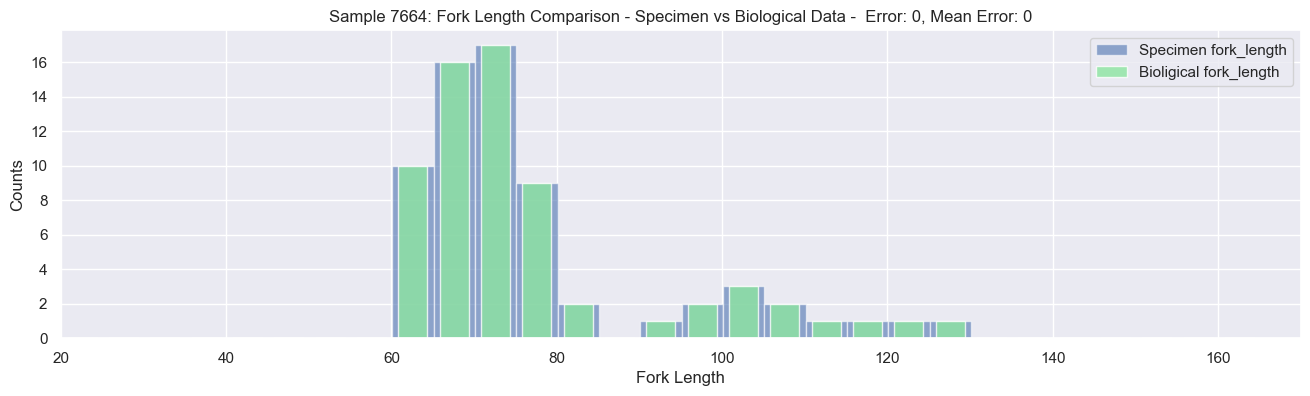

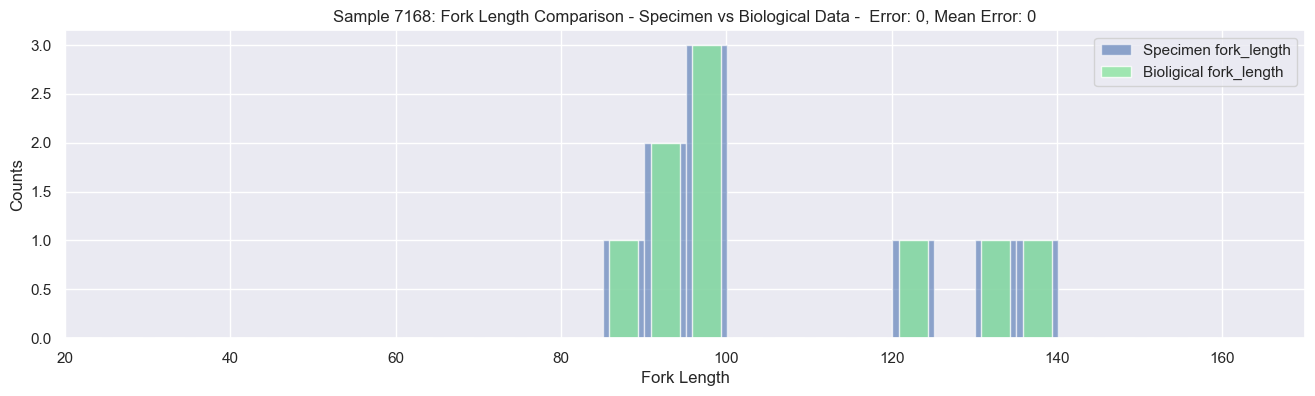

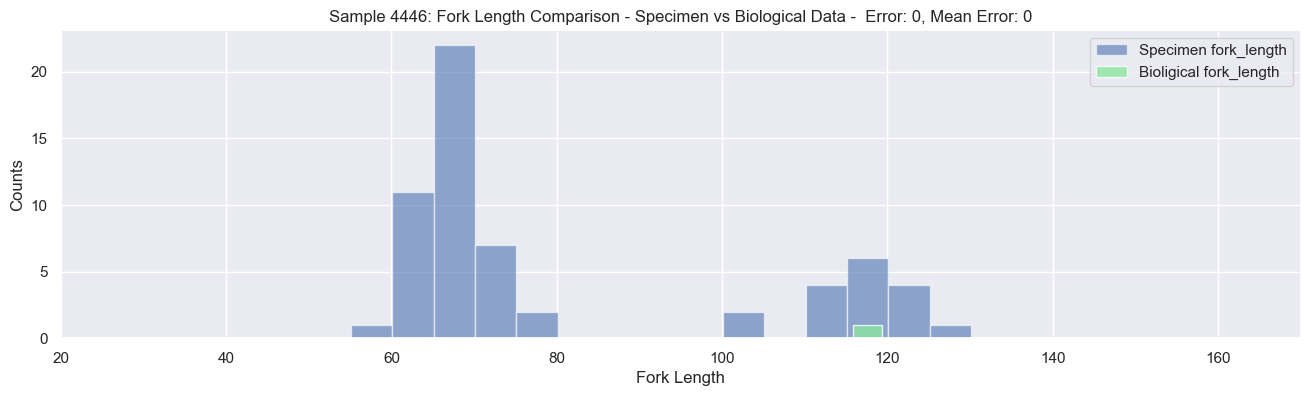

In [8]:
# plot a few
for i in df_recommendations[df_recommendations.zero_error_sample==True].sample(3).index:
    plot_fork_length_by_sample(df_spec, df_hist, i, subtitle=f' Error: {round(df_recommendations.loc[i].error)}, Mean Error: {round(df_recommendations.loc[i].mean_error)}', duplicate=True)

# RECOMMENDATIONS: 
### high_error_potential_duplicate == False  ->  duplicate = False
### high_error_potential_duplicate == True  ->  duplicate = True or None
### recommend inspecting histograms for more potential duplicates

In [9]:
print('Summary Flag:', flag := all_flags[3])
display(df_recommendations[df_recommendations[flag].notnull()][other_columns + ['high_error_potential_duplicate']].describe(include='all'))

Summary Flag: high_error_potential_duplicate


,n_hist,n_spec,error,mean_error,high_error_potential_duplicate
count,30.000,30.000,30.000,30.000,30
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,29
mean,24.200,70.567,1303.900,142.724,NaN
std,13.601,52.167,2960.834,424.366,NaN
min,5.000,22.000,105.000,3.667,NaN
25%,21.000,34.250,148.750,6.905,NaN
50%,25.000,52.500,310.000,12.058,NaN
75%,29.000,83.250,433.750,16.172,NaN


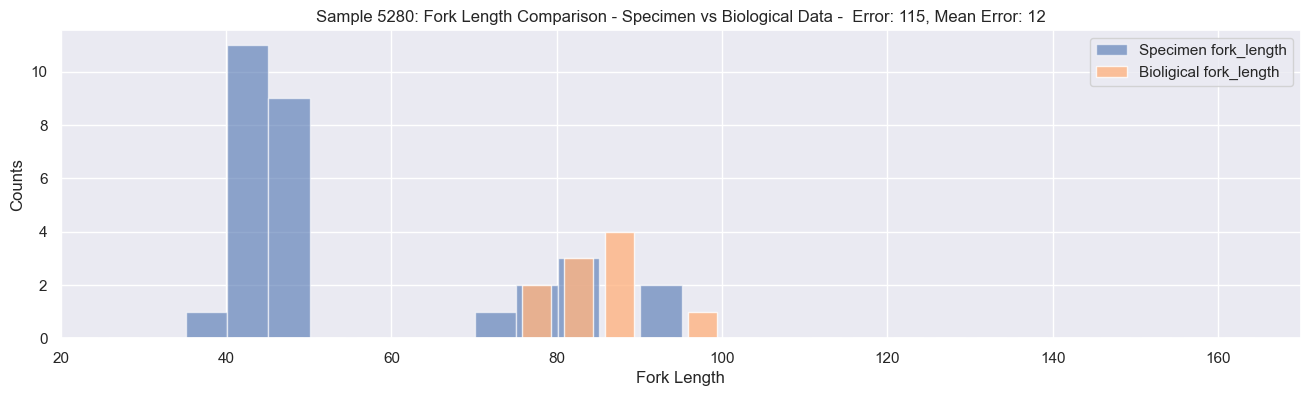

In [10]:
# these look like potential duplicates even though they have high error
for i in df_recommendations[df_recommendations[flag] == True].index:
    plot_fork_length_by_sample(df_spec, df_hist, i, subtitle=f' Error: {round(df_recommendations.loc[i].error)}, Mean Error: {round(df_recommendations.loc[i].mean_error)}')

# RECOMMENDATIONS: matched_counts == True
### duplicate = True
### inspect histograms for exceptions

In [11]:
print('Summary Flag:', flag := all_flags[4])
display(df_recommendations[df_recommendations[flag].notnull()][other_columns].describe())

Summary Flag: matched_counts


,n_hist,n_spec,error,mean_error
count,179.000,179.000,179.000,179.000
mean,54.302,54.302,2.626,0.285
std,62.732,62.732,13.464,1.329
min,1.000,1.000,0.000,0.000
25%,11.000,11.000,0.000,0.000
50%,33.000,33.000,0.000,0.000
75%,68.000,68.000,0.000,0.000
max,346.000,346.000,135.000,13.333


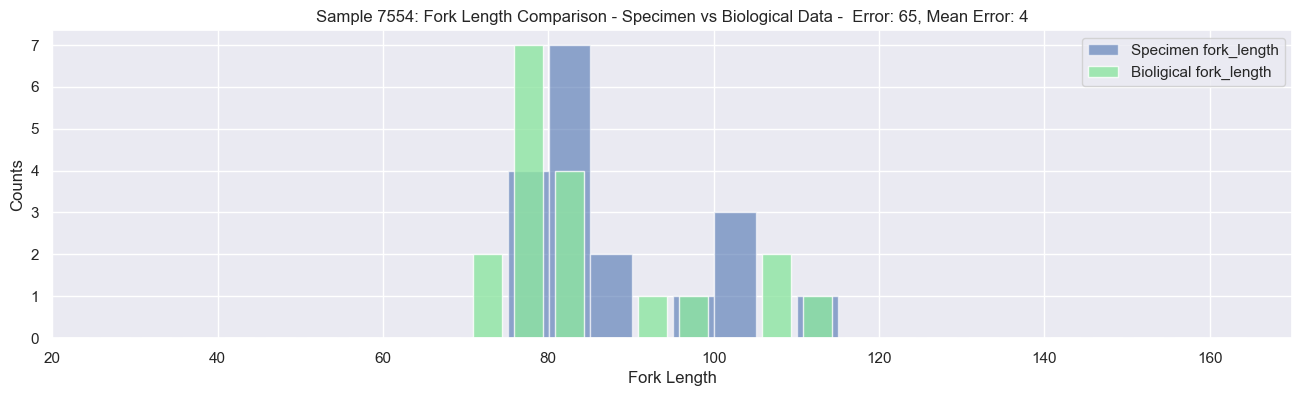

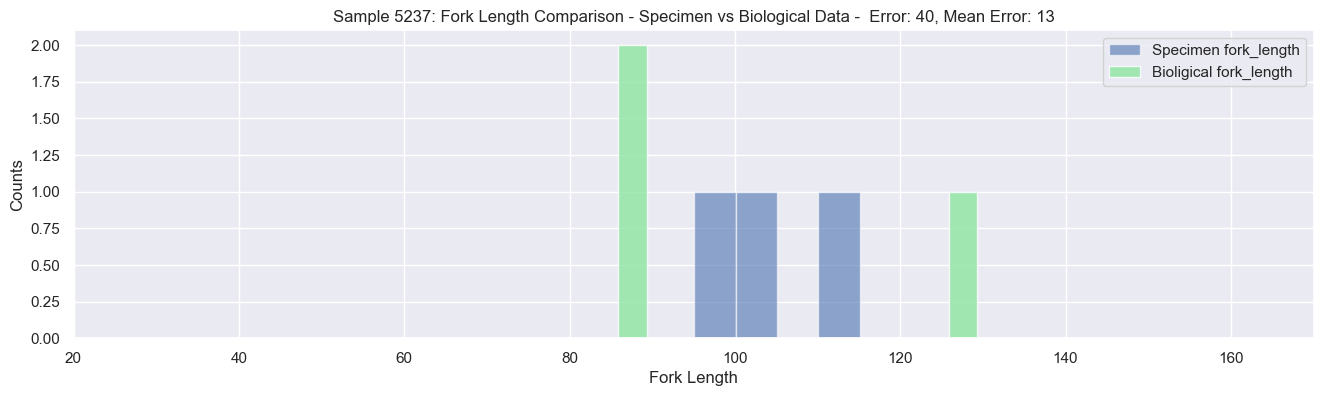

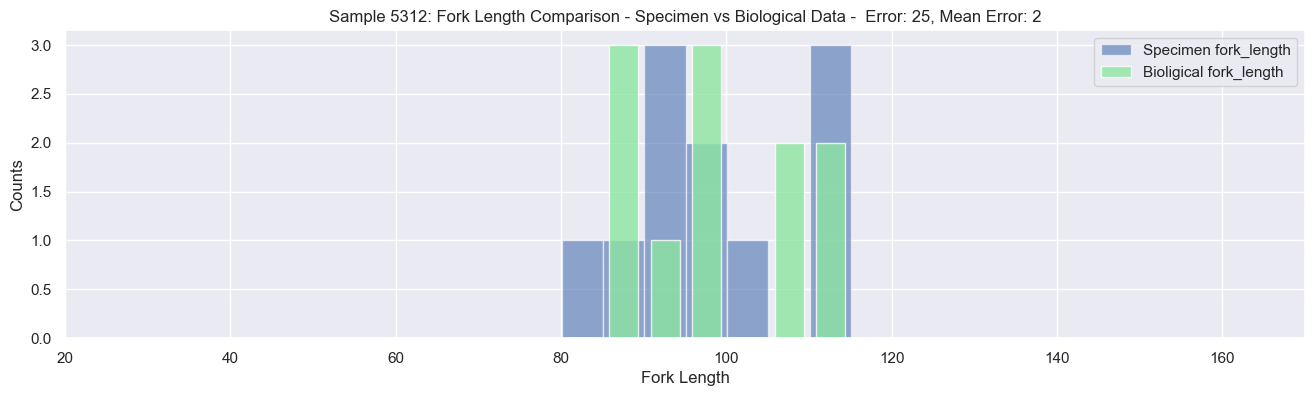

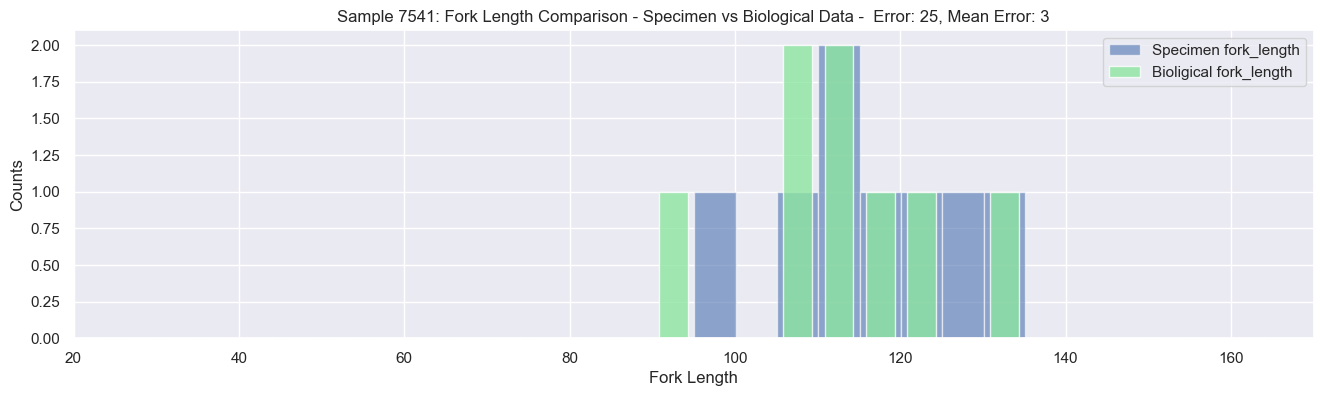

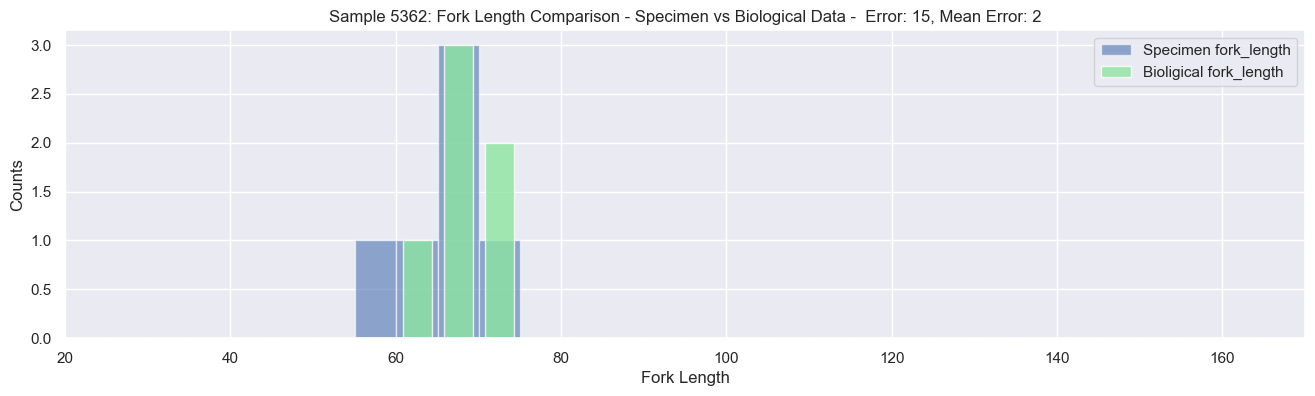

In [12]:
# let's check a few outliers
for i in df_recommendations[(df_recommendations.matched_counts==True) & (df_recommendations.error>10)].sample(5).index:
    plot_fork_length_by_sample(df_spec, df_hist, i, subtitle=f' Error: {round(df_recommendations.loc[i].error)}, Mean Error: {round(df_recommendations.loc[i].mean_error)}', duplicate=True)

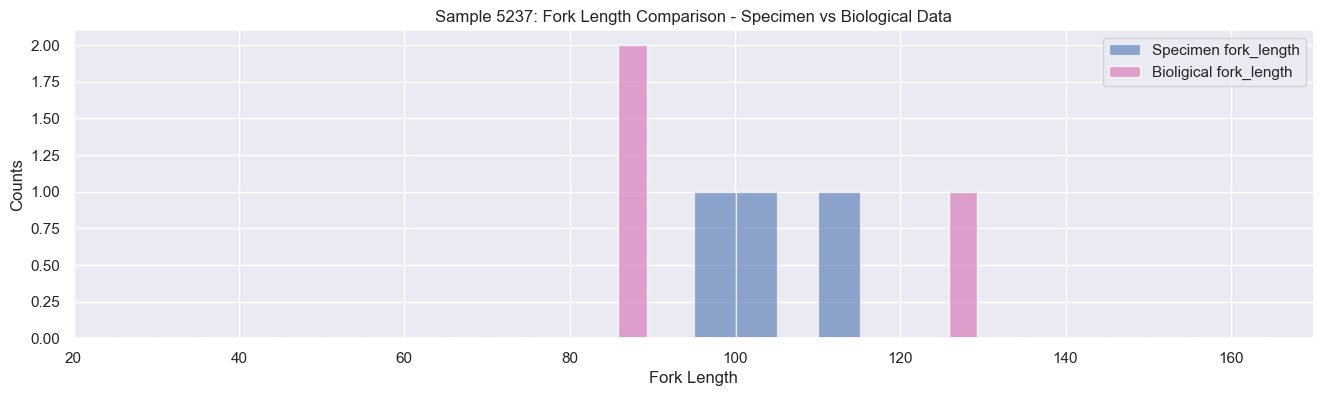

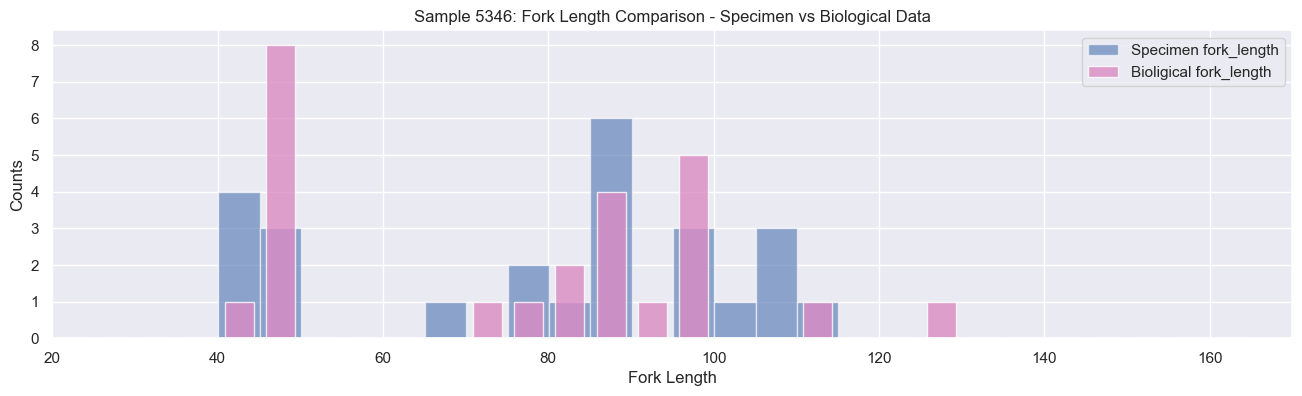

In [13]:
potential_exceptions = [5237, 5346]
for i in potential_exceptions:
    plot_fork_length_by_sample(df_spec, df_hist, i, duplicate=False)